In [1]:
import pandas as pd
import seaborn as sb

In [2]:
train = pd.read_csv("train.csv")

# EDA

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

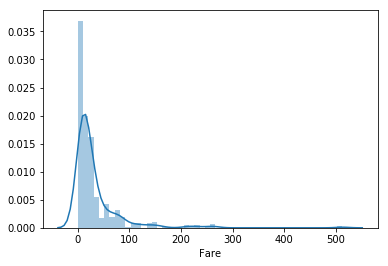

In [6]:
sb.distplot(train["Fare"])

In [7]:
train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [8]:
import numpy as np
for i in range(len(train["Fare"])):
    if train["Fare"].iloc()[i] < 1:
        train["Fare"].iloc()[i] = 1

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


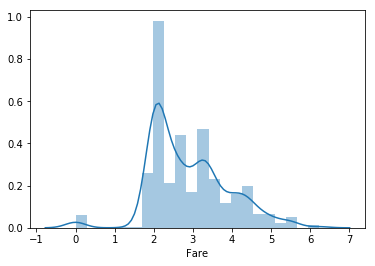

In [9]:
train["Fare"] = pd.Series(np.log(train["Fare"]))
sb.distplot(train["Fare"])

In [10]:
train["Cabin"].isna().sum()

687

In [11]:
train["Cabin"].size

891

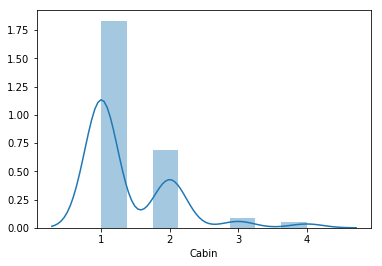

In [12]:
sb.distplot(train["Cabin"].value_counts())

In [13]:
print("Null value percentage for Cabin column is: %" + str(train["Cabin"].isna().sum()* 100/ train["Cabin"].size))

Null value percentage for Cabin column is: %77.10437710437711


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


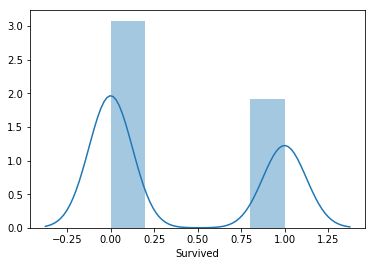

In [15]:
sb.distplot(train["Survived"])

In [16]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

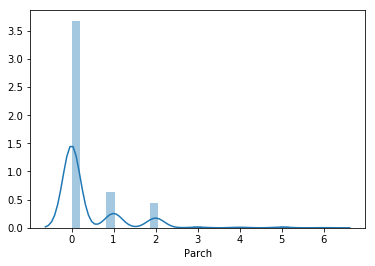

In [18]:
sb.distplot(train["Parch"])

In [19]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

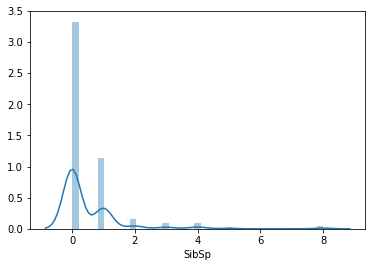

In [20]:
sb.distplot(train["SibSp"])

In [21]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
train["Age"].round().describe()

count    714.000000
mean      29.693277
std       14.524527
min        0.000000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
train["Age"] = train["Age"].round()

In [24]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [25]:
train["Age"].describe()

count    891.000000
mean      29.693277
std       13.000252
min        0.000000
25%       22.000000
50%       29.693277
75%       35.000000
max       80.000000
Name: Age, dtype: float64

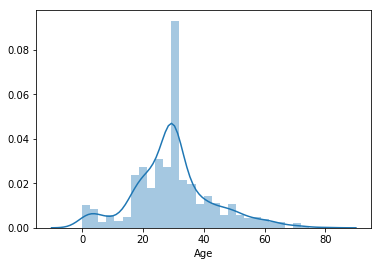

In [26]:
sb.distplot(train["Age"])

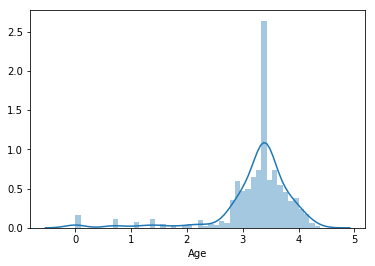

In [27]:
for i in range(len(train["Age"])):
    if train["Age"].iloc()[i] < 1:
        train["Age"].iloc()[i] = 1
train["Age"] = pd.Series(np.log(train["Age"]))
sb.distplot(train["Age"])

In [28]:
train["Name"].value_counts() 
#Since names are highly unlikely to have any significance with the problem,
# we will drop this column.

Givard, Mr. Hans Kristensen                                      1
Panula, Mr. Jaako Arnold                                         1
Moutal, Mr. Rahamin Haim                                         1
Goodwin, Mr. Charles Edward                                      1
Turkula, Mrs. (Hedwig)                                           1
Kink, Mr. Vincenz                                                1
Goldsmith, Mrs. Frank John (Emily Alice Brown)                   1
Yousseff, Mr. Gerious                                            1
Jerwan, Mrs. Amin S (Marie Marthe Thuillard)                     1
Coleff, Mr. Peju                                                 1
Futrelle, Mr. Jacques Heath                                      1
Campbell, Mr. William                                            1
Hansen, Mr. Henrik Juul                                          1
Bourke, Miss. Mary                                               1
Shutes, Miss. Elizabeth W                                     

In [29]:
train.drop(["Name"], axis=1, inplace = True)

In [30]:
#We need to convert some columns to type of objects, because they 
#represent categorical variables, e.g. Pclass
train["Pclass"] = train["Pclass"].astype("object")
train["SibSp"] = train["SibSp"].astype("object")
train["Parch"] = train["Parch"].astype("object")

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null object
Parch          891 non-null object
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 76.6+ KB


In [32]:
#Lets also drop Cabin column since it has many null values.
train.drop(["Cabin"], axis=1, inplace = True)

In [33]:
label = pd.get_dummies(pd.Series(train["Survived"], dtype='object'))
train.drop(["Survived"], axis = 1, inplace = True)

In [34]:
train.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,male,3.091042,1,0,A/5 21171,1.981001,S
1,2,1,female,3.637586,1,0,PC 17599,4.266662,C
2,3,3,female,3.258097,0,0,STON/O2. 3101282,2.070022,S
3,4,1,female,3.555348,1,0,113803,3.972177,S
4,5,3,male,3.555348,0,0,373450,2.085672,S
5,6,3,male,3.390921,0,0,330877,2.135148,Q
6,7,1,male,3.988984,0,0,17463,3.948596,S
7,8,3,male,0.693147,3,1,349909,3.048088,S
8,9,3,female,3.295837,0,2,347742,2.409941,S
9,10,2,female,2.639057,1,0,237736,3.403555,C


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Pclass         891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null object
Parch          891 non-null object
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 62.7+ KB


In [36]:
train.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# Test set conversions

In [37]:
test = pd.read_csv("test.csv")
test["Pclass"] = test["Pclass"].astype("object")
test["SibSp"] = test["SibSp"].astype("object")
test["Parch"] = test["Parch"].astype("object")
test.drop(["Cabin"], axis=1, inplace = True)
test.drop(["Name"], axis=1, inplace = True)
test["Age"] = test["Age"].round()
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

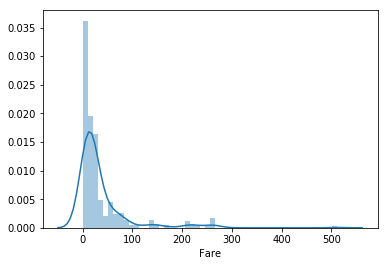

In [38]:
sb.distplot(test["Fare"])

In [39]:
for i in range(len(test["Fare"])):
    if test["Fare"].iloc()[i] < 1:
        test["Fare"].iloc()[i] = 1
test["Fare"] = pd.Series(np.log(test["Fare"]))


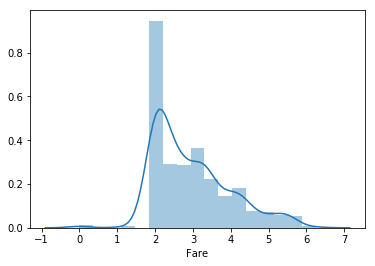

In [40]:
sb.distplot(test["Fare"])

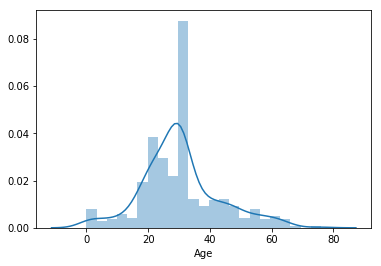

In [41]:
sb.distplot(test["Age"])

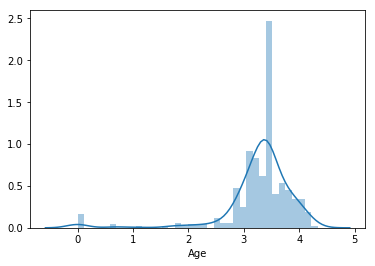

In [42]:
for i in range(len(test["Age"])):
    if test["Age"].iloc()[i] < 1:
        test["Age"].iloc()[i] = 1
test["Age"] = pd.Series(np.log(test["Age"]))
sb.distplot(test["Age"])

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null object
Parch          418 non-null object
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 29.5+ KB


In [44]:
train['train'] = 1
test['train'] = 0
combined = pd.concat([train, test])

tickets = combined["Ticket"]
combined.drop(["Ticket"], axis = 1, inplace = True)

df = pd.get_dummies(combined, columns = list(combined.select_dtypes(include='object')))

train = df[df['train'] == 1]
test = df[df['train'] == 0]
    
train.drop(["train"], axis = 1, inplace = True)
test.drop(["train"], axis = 1, inplace = True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


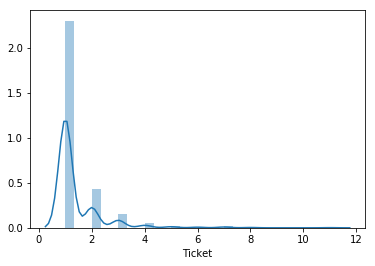

In [45]:
sb.distplot(tickets.value_counts())

In [46]:
(tickets.value_counts() == 1).sum()

713

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 26 columns):
PassengerId    891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
SibSp_0        891 non-null uint8
SibSp_1        891 non-null uint8
SibSp_2        891 non-null uint8
SibSp_3        891 non-null uint8
SibSp_4        891 non-null uint8
SibSp_5        891 non-null uint8
SibSp_8        891 non-null uint8
Parch_0        891 non-null uint8
Parch_1        891 non-null uint8
Parch_2        891 non-null uint8
Parch_3        891 non-null uint8
Parch_4        891 non-null uint8
Parch_5        891 non-null uint8
Parch_6        891 non-null uint8
Parch_9        891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes:

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 26 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Pclass_1       418 non-null uint8
Pclass_2       418 non-null uint8
Pclass_3       418 non-null uint8
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
SibSp_0        418 non-null uint8
SibSp_1        418 non-null uint8
SibSp_2        418 non-null uint8
SibSp_3        418 non-null uint8
SibSp_4        418 non-null uint8
SibSp_5        418 non-null uint8
SibSp_8        418 non-null uint8
Parch_0        418 non-null uint8
Parch_1        418 non-null uint8
Parch_2        418 non-null uint8
Parch_3        418 non-null uint8
Parch_4        418 non-null uint8
Parch_5        418 non-null uint8
Parch_6        418 non-null uint8
Parch_9        418 non-null uint8
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
dtypes:

In [49]:
train.drop(["PassengerId"], axis = 1, inplace = True)
passengerIdTest = test["PassengerId"]
test.drop(["PassengerId"], axis = 1, inplace = True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [50]:
#Normalizing the data
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#train = sc.fit_transform(train)
#test = sc.fit_transform(test)

# Modelling Time

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,label,test_size=0.25,random_state=0)

In [52]:
#add DL here
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers

# Neural network
model = Sequential()
model.add(Dense(25, input_dim = 25, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='sigmoid'))

Using TensorFlow backend.


In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 100)
###FOR TRAIN AND VALIDATION, USE HERE!
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=500,  batch_size=32, callbacks=[es])
###FOR INFERENCE, USE THIS LINE!
#history = model.fit(train, label, epochs=500,  batch_size=64, callbacks=[es])

Train on 668 samples, validate on 223 samples
Epoch 1/500
668/668 [==============================] - 0s 450us/step - loss: 0.7042 - accuracy: 0.5876 - val_loss: 0.6487 - val_accuracy: 0.6592
Epoch 2/500
668/668 [==============================] - 0s 59us/step - loss: 0.7225 - accuracy: 0.5943 - val_loss: 0.6457 - val_accuracy: 0.6435
Epoch 3/500
668/668 [==============================] - 0s 63us/step - loss: 0.6749 - accuracy: 0.5838 - val_loss: 0.6339 - val_accuracy: 0.6278
Epoch 4/500
668/668 [==============================] - 0s 63us/step - loss: 0.6600 - accuracy: 0.6100 - val_loss: 0.6169 - val_accuracy: 0.6278
Epoch 5/500
668/668 [==============================] - 0s 60us/step - loss: 0.6445 - accuracy: 0.6153 - val_loss: 0.6019 - val_accuracy: 0.6256
Epoch 6/500
668/668 [==============================] - 0s 56us/step - loss: 0.6502 - accuracy: 0.5966 - val_loss: 0.5952 - val_accuracy: 0.6256
Epoch 7/500
668/668 [==============================] - 0s 57us/step - loss: 0.6494 - accu

668/668 [==============================] - 0s 47us/step - loss: 0.6107 - accuracy: 0.6841 - val_loss: 0.5109 - val_accuracy: 0.7915
Epoch 58/500
668/668 [==============================] - 0s 49us/step - loss: 0.5657 - accuracy: 0.7313 - val_loss: 0.5065 - val_accuracy: 0.7915
Epoch 59/500
668/668 [==============================] - 0s 46us/step - loss: 0.5843 - accuracy: 0.7335 - val_loss: 0.5060 - val_accuracy: 0.7937
Epoch 60/500
668/668 [==============================] - 0s 49us/step - loss: 0.5752 - accuracy: 0.7268 - val_loss: 0.5083 - val_accuracy: 0.8027
Epoch 61/500
668/668 [==============================] - 0s 47us/step - loss: 0.5792 - accuracy: 0.6931 - val_loss: 0.5052 - val_accuracy: 0.7937
Epoch 62/500
668/668 [==============================] - 0s 52us/step - loss: 0.5721 - accuracy: 0.7186 - val_loss: 0.5081 - val_accuracy: 0.7937
Epoch 63/500
668/668 [==============================] - 0s 55us/step - loss: 0.5667 - accuracy: 0.7440 - val_loss: 0.4983 - val_accuracy: 0.793

668/668 [==============================] - 0s 52us/step - loss: 0.5431 - accuracy: 0.7612 - val_loss: 0.4602 - val_accuracy: 0.7915
Epoch 114/500
668/668 [==============================] - 0s 49us/step - loss: 0.5058 - accuracy: 0.7934 - val_loss: 0.4606 - val_accuracy: 0.7937
Epoch 115/500
668/668 [==============================] - 0s 45us/step - loss: 0.5037 - accuracy: 0.7777 - val_loss: 0.4568 - val_accuracy: 0.7937
Epoch 116/500
668/668 [==============================] - 0s 49us/step - loss: 0.5087 - accuracy: 0.7964 - val_loss: 0.4559 - val_accuracy: 0.7960
Epoch 117/500
668/668 [==============================] - 0s 47us/step - loss: 0.4939 - accuracy: 0.7754 - val_loss: 0.4532 - val_accuracy: 0.7960
Epoch 118/500
668/668 [==============================] - 0s 46us/step - loss: 0.5160 - accuracy: 0.7814 - val_loss: 0.4528 - val_accuracy: 0.7915
Epoch 119/500
668/668 [==============================] - 0s 49us/step - loss: 0.5034 - accuracy: 0.7717 - val_loss: 0.4557 - val_accuracy:

668/668 [==============================] - 0s 55us/step - loss: 0.5041 - accuracy: 0.7979 - val_loss: 0.4418 - val_accuracy: 0.7982
Epoch 170/500
668/668 [==============================] - 0s 56us/step - loss: 0.4786 - accuracy: 0.8136 - val_loss: 0.4391 - val_accuracy: 0.7982
Epoch 171/500
668/668 [==============================] - 0s 48us/step - loss: 0.5034 - accuracy: 0.7979 - val_loss: 0.4376 - val_accuracy: 0.7982
Epoch 172/500
668/668 [==============================] - 0s 52us/step - loss: 0.4819 - accuracy: 0.7927 - val_loss: 0.4399 - val_accuracy: 0.7982
Epoch 173/500
668/668 [==============================] - 0s 51us/step - loss: 0.4998 - accuracy: 0.8069 - val_loss: 0.4384 - val_accuracy: 0.7960
Epoch 174/500
668/668 [==============================] - 0s 47us/step - loss: 0.4720 - accuracy: 0.8039 - val_loss: 0.4358 - val_accuracy: 0.7937
Epoch 175/500
668/668 [==============================] - 0s 49us/step - loss: 0.4840 - accuracy: 0.8166 - val_loss: 0.4362 - val_accuracy:

Epoch 225/500
668/668 [==============================] - 0s 49us/step - loss: 0.4519 - accuracy: 0.8039 - val_loss: 0.4409 - val_accuracy: 0.8027
Epoch 226/500
668/668 [==============================] - 0s 47us/step - loss: 0.4952 - accuracy: 0.7919 - val_loss: 0.4421 - val_accuracy: 0.8027
Epoch 227/500
668/668 [==============================] - 0s 51us/step - loss: 0.4921 - accuracy: 0.7844 - val_loss: 0.4413 - val_accuracy: 0.8072
Epoch 228/500
668/668 [==============================] - 0s 47us/step - loss: 0.4674 - accuracy: 0.8009 - val_loss: 0.4419 - val_accuracy: 0.8072
Epoch 229/500
668/668 [==============================] - 0s 48us/step - loss: 0.4771 - accuracy: 0.8338 - val_loss: 0.4440 - val_accuracy: 0.8094
Epoch 230/500
668/668 [==============================] - 0s 46us/step - loss: 0.5061 - accuracy: 0.8039 - val_loss: 0.4456 - val_accuracy: 0.8027
Epoch 231/500
668/668 [==============================] - 0s 48us/step - loss: 0.4638 - accuracy: 0.8196 - val_loss: 0.4440 -

668/668 [==============================] - 0s 49us/step - loss: 0.4597 - accuracy: 0.8166 - val_loss: 0.4369 - val_accuracy: 0.8117
Epoch 282/500
668/668 [==============================] - 0s 53us/step - loss: 0.4682 - accuracy: 0.8174 - val_loss: 0.4357 - val_accuracy: 0.8072
Epoch 283/500
668/668 [==============================] - 0s 48us/step - loss: 0.4744 - accuracy: 0.8263 - val_loss: 0.4382 - val_accuracy: 0.8072
Epoch 284/500
668/668 [==============================] - 0s 49us/step - loss: 0.4629 - accuracy: 0.8159 - val_loss: 0.4392 - val_accuracy: 0.8072
Epoch 285/500
668/668 [==============================] - 0s 46us/step - loss: 0.4822 - accuracy: 0.8249 - val_loss: 0.4426 - val_accuracy: 0.8072
Epoch 286/500
668/668 [==============================] - 0s 49us/step - loss: 0.4693 - accuracy: 0.8136 - val_loss: 0.4421 - val_accuracy: 0.8027
Epoch 287/500
668/668 [==============================] - 0s 48us/step - loss: 0.4714 - accuracy: 0.8256 - val_loss: 0.4430 - val_accuracy:

In [54]:
import numpy as np
y_pred = model.predict(test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    #pred.append(1 if y_pred[i] > 0.5 else 0)

In [55]:
#For training part, change the one-hot encoding back to normal for y_test label data.
testy = list()
for i in range( len(y_test) ):
   testy.append(0 if y_test.iloc[i][0] == 1 else 1)

In [56]:
from sklearn.metrics import accuracy_score
#accuracy_score(testy, pred)

# Data Preparation for Submission

In [57]:
import numpy as np
submission = pd.DataFrame({'PassengerId':passengerIdTest,'Survived':pred})
filename = 'submissionDL.csv'
submission.to_csv(filename,index=False)

In [58]:
#pred

In [59]:
#Kaggle inference result is 0.80382